<a href="https://colab.research.google.com/github/dhanalakshmi3149/diabatics/blob/main/clustering_using_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
path="/content/drive/MyDrive/Colab Notebooks/Customer.csv"


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
#Reading  onlineRetailfile
df = spark.read.csv(path,
                             inferSchema=True,
                             header=True)

In [30]:
!pip install pyspark

In [32]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CustomerData").getOrCreate()

In [35]:
#Reading  onlineRetailfile
df = spark.read.csv(path,
                             inferSchema=True,
                             header=True)

In [36]:
df.show(7)


+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+
| C10001|  40.900749|         0.818182|     95.4|             0.0|                  95.4|  

In [37]:
df.columns


['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [38]:
df.printSchema()


root
 |-- CUST_ID: string (nullable = true)
 |-- BALANCE: double (nullable = true)
 |-- BALANCE_FREQUENCY: double (nullable = true)
 |-- PURCHASES: double (nullable = true)
 |-- ONEOFF_PURCHASES: double (nullable = true)
 |-- INSTALLMENTS_PURCHASES: double (nullable = true)
 |-- CASH_ADVANCE: double (nullable = true)
 |-- PURCHASES_FREQUENCY: double (nullable = true)
 |-- ONEOFF_PURCHASES_FREQUENCY: double (nullable = true)
 |-- PURCHASES_INSTALLMENTS_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_TRX: integer (nullable = true)
 |-- PURCHASES_TRX: integer (nullable = true)
 |-- CREDIT_LIMIT: double (nullable = true)
 |-- PAYMENTS: double (nullable = true)
 |-- MINIMUM_PAYMENTS: double (nullable = true)
 |-- PRC_FULL_PAYMENT: double (nullable = true)
 |-- TENURE: integer (nullable = true)



In [39]:
df.count()


8950

In [40]:
# showing colmns having null values
df.filter(df.BALANCE.isNotNull()).show()

+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+
| C10001|  40.900749|         0.818182|     95.4|             0.0|                  95.4|  

In [41]:
from pyspark.sql.functions import col,isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()


+-------+-------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+--------+----------------+----------------+------+
|CUST_ID|BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|
+-------+-------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+--------+----------------+----------------+------+
|      0|      0|                0|        0|               0|                     0|           0|              

In [42]:
# counting how many time zero has appeared in a column
for c in df.columns:

  print(c,df.filter(col(c)==0).count())

CUST_ID 0
BALANCE 80
BALANCE_FREQUENCY 80
PURCHASES 2044
ONEOFF_PURCHASES 4302
INSTALLMENTS_PURCHASES 3916
CASH_ADVANCE 4628
PURCHASES_FREQUENCY 2043
ONEOFF_PURCHASES_FREQUENCY 4302
PURCHASES_INSTALLMENTS_FREQUENCY 3915
CASH_ADVANCE_FREQUENCY 4628
CASH_ADVANCE_TRX 4628
PURCHASES_TRX 2044
CREDIT_LIMIT 0
PAYMENTS 240
MINIMUM_PAYMENTS 0
PRC_FULL_PAYMENT 5903
TENURE 0


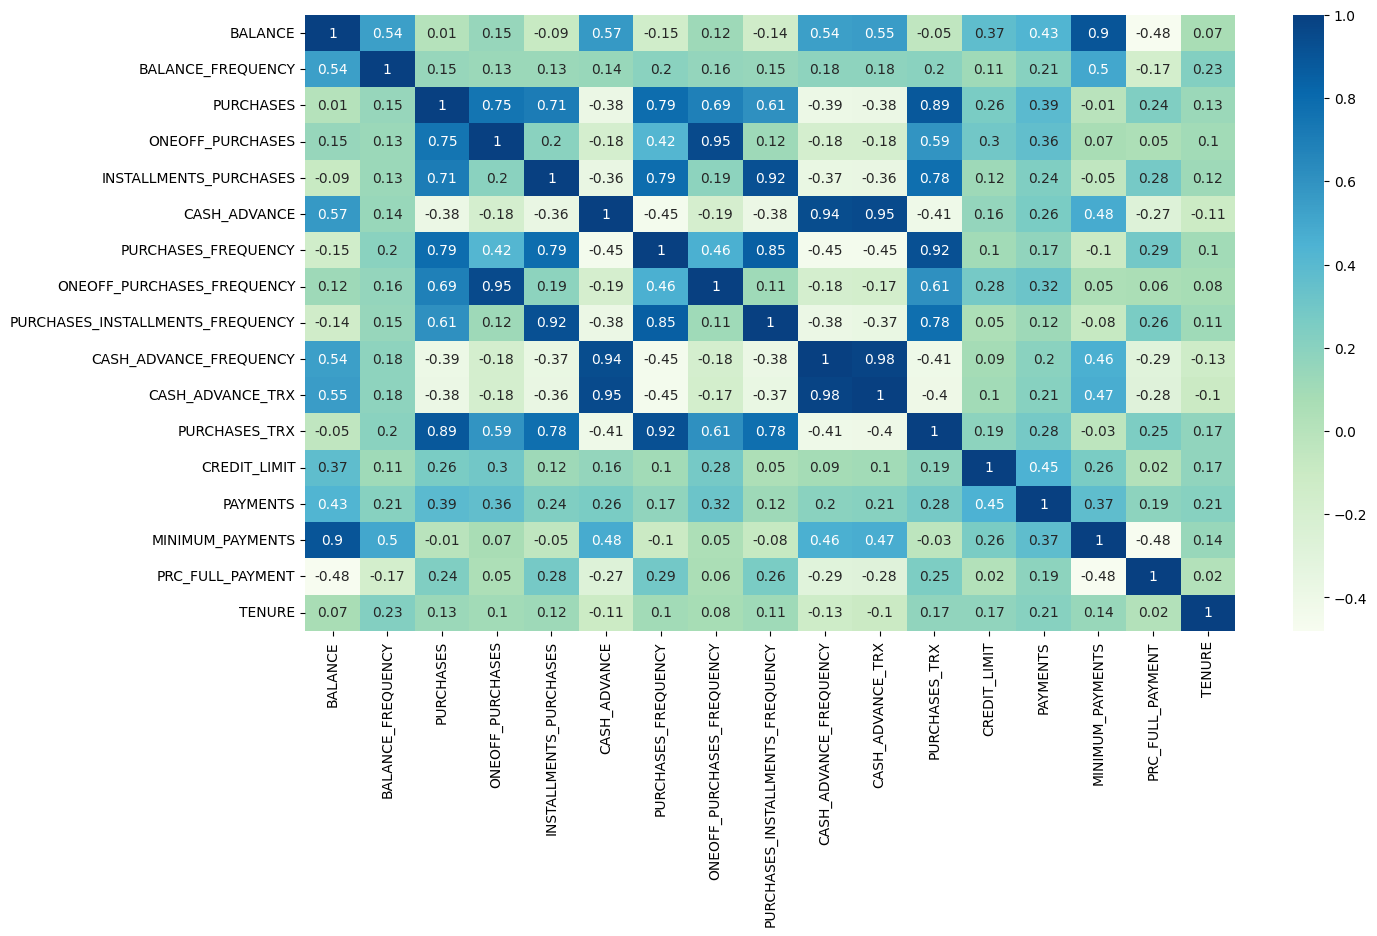

In [43]:
from os import pidfd_open
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
pddf= df.toPandas()
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

plt.figure(figsize=(15, 8))
sns.heatmap(round(pddf[numerical_features].corr(method='spearman'), 2),
            annot=True, mask=None, cmap='GnBu')
plt.show()

Correlation features[1:12]  0.10432322392432858
<class 'pyspark.sql.dataframe.DataFrame'>


<Axes: >

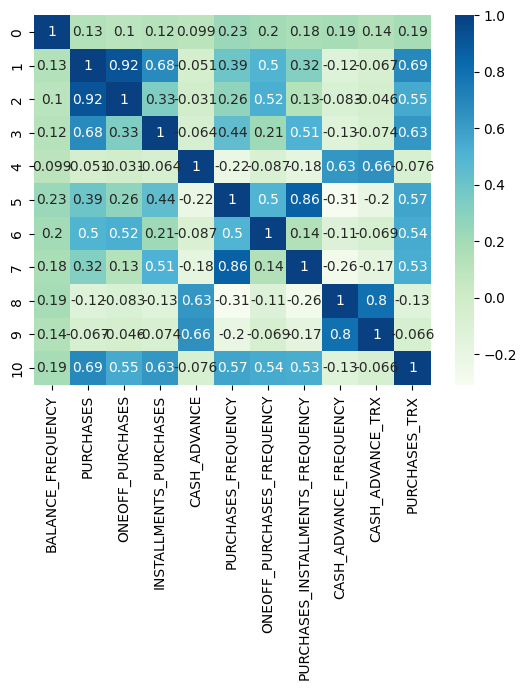

In [44]:
# Calculate Correlation Using Using MLlib
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Assemble feature vector
# Define the feature and label columns & Assemble the feature vector
vector_assembler = VectorAssembler(inputCols=numerical_features[1:12] , outputCol="features")
data_vector = vector_assembler.transform(df).select("features")

# Calculate correlation
correlation_matrix = Correlation.corr(data_vector, "features").head()[0]

print("Correlation features[1:12] ", correlation_matrix[0, 2])
df2 = spark.createDataFrame(correlation_matrix.toArray().tolist(),numerical_features[1:12])
print(type(df2))
sns.heatmap(df2.toPandas(),
            annot=True, mask=None, cmap='GnBu')

In [45]:
from pyspark.ml.feature import VectorAssembler
ClusteringColumns = ['BALANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']

ClusteringColumns = [
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']

assembler=VectorAssembler(inputCols=ClusteringColumns, outputCol="features")
featureDf = assembler.transform(df)
featureDf.printSchema()
featureDf.show(10)

root
 |-- CUST_ID: string (nullable = true)
 |-- BALANCE: double (nullable = true)
 |-- BALANCE_FREQUENCY: double (nullable = true)
 |-- PURCHASES: double (nullable = true)
 |-- ONEOFF_PURCHASES: double (nullable = true)
 |-- INSTALLMENTS_PURCHASES: double (nullable = true)
 |-- CASH_ADVANCE: double (nullable = true)
 |-- PURCHASES_FREQUENCY: double (nullable = true)
 |-- ONEOFF_PURCHASES_FREQUENCY: double (nullable = true)
 |-- PURCHASES_INSTALLMENTS_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_TRX: integer (nullable = true)
 |-- PURCHASES_TRX: integer (nullable = true)
 |-- CREDIT_LIMIT: double (nullable = true)
 |-- PAYMENTS: double (nullable = true)
 |-- MINIMUM_PAYMENTS: double (nullable = true)
 |-- PRC_FULL_PAYMENT: double (nullable = true)
 |-- TENURE: integer (nullable = true)
 |-- features: vector (nullable = true)

+-------+-----------+-----------------+---------+----------------+----------------------+----------

In [46]:
#preparing data for clustering
featureDf.count()
trainingData, testData = featureDf.randomSplit([0.7, 0.3], seed = 5043)
print(type(trainingData))
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))
trainingData.show(10)
testData.columns

<class 'pyspark.sql.dataframe.DataFrame'>
Training Dataset Count: 6230
Test Dataset Count: 2720
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------------------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|            features|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-------

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'features']

In [47]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
cluster_count = [5]#[10,30,50,70,90]
wssse_values =[]
for i in range(2,8):
  kmeans = KMeans().setK(i).setSeed(1).setFeaturesCol("features").setPredictionCol("prediction")
  kmeansModel = kmeans.fit(trainingData)

  # test the model with test data set
  predictDf = kmeansModel.transform(testData)


  evaluator = ClusteringEvaluator()
  silhouette = evaluator.evaluate(predictDf)

  wssse_values.append(silhouette)
  print("clusters= "+str(i) +" Silhouette with squared euclidean distance"+ str(silhouette))
  for clusters in kmeansModel.clusterCenters():
    print("cluster centres",clusters)

clusters= 2 Silhouette with squared euclidean distance0.7262330385019005
cluster centres [0.15687214 0.09449148 0.06073336]
cluster centres [0.88791336 0.33269989 0.72914872]
clusters= 3 Silhouette with squared euclidean distance0.7618353464955893
cluster centres [0.87409558 0.11123544 0.8246024 ]
cluster centres [0.1442863  0.07977909 0.06301707]
cluster centres [0.89149357 0.80361777 0.46950388]
clusters= 4 Silhouette with squared euclidean distance0.7508674978255471
cluster centres [0.8482545  0.07585216 0.79591875]
cluster centres [0.11433774 0.05992328 0.05262309]
cluster centres [0.72150848 0.66817892 0.11687568]
cluster centres [0.97346948 0.76418497 0.84295846]
clusters= 5 Silhouette with squared euclidean distance0.7556985880680238
cluster centres [0.95533308 0.08093867 0.91956748]
cluster centres [0.07993906 0.05904202 0.02009805]
cluster centres [0.54583307 0.09971671 0.45099293]
cluster centres [0.96728528 0.7766264  0.82385613]
cluster centres [0.73354081 0.70959732 0.0744

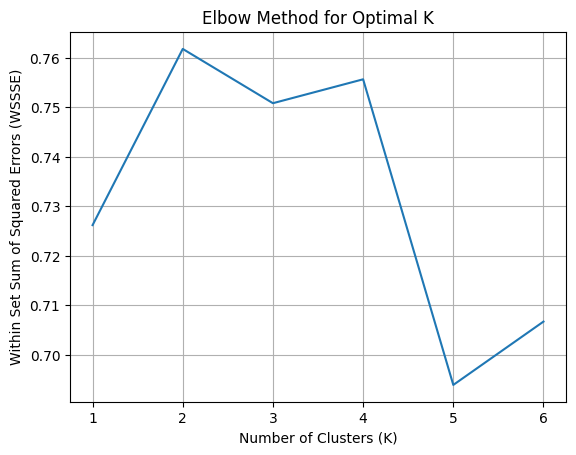

In [48]:
# Plotting WSSSE values
plt.plot(range(1, 7), wssse_values)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within Set Sum of Squared Errors (WSSSE)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

In [49]:
# test the model with test data set
predictDf = kmeansModel.transform(testData)
predictDf.show(10)
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictDf)
print("Silhouette with squared euclidean distance = " + str(silhouette))


+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------------------+----------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|            features|prediction|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------------------+-------

In [50]:
predictDf.groupBy("prediction").count().show()


+----------+-----+
|prediction|count|
+----------+-----+
|         1|  521|
|         6|  154|
|         3|  387|
|         5|  103|
|         4|  148|
|         2| 1193|
|         0|  214|
+----------+-----+



In [51]:
pddf_pred = predictDf.toPandas()


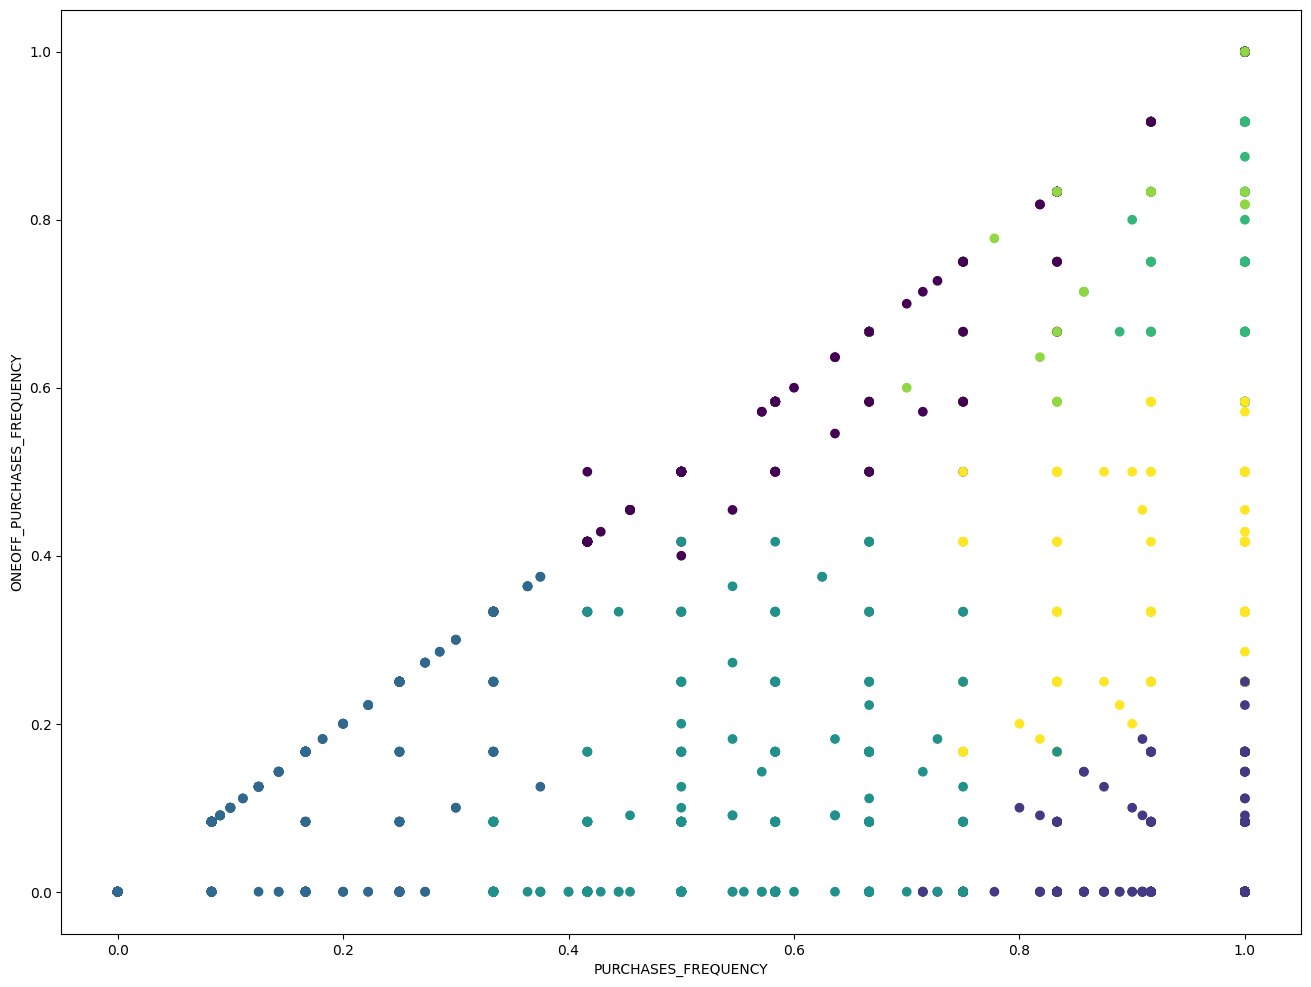

<Figure size 1200x1000 with 0 Axes>

In [52]:
import matplotlib.pyplot as plt
pddf_pred = predictDf.toPandas()
ClusteringColumns = ['BALANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']
pddf_pred.head()
fig = plt.figure(figsize=(16,12))
KmVis= fig.add_subplot(111)
threedee = plt.figure(figsize=(12,10))
KmVis.scatter(pddf_pred.PURCHASES_FREQUENCY, pddf_pred.ONEOFF_PURCHASES_FREQUENCY,  c=pddf_pred.prediction)
KmVis.set_xlabel('PURCHASES_FREQUENCY')
KmVis.set_ylabel('ONEOFF_PURCHASES_FREQUENCY')

plt.show()

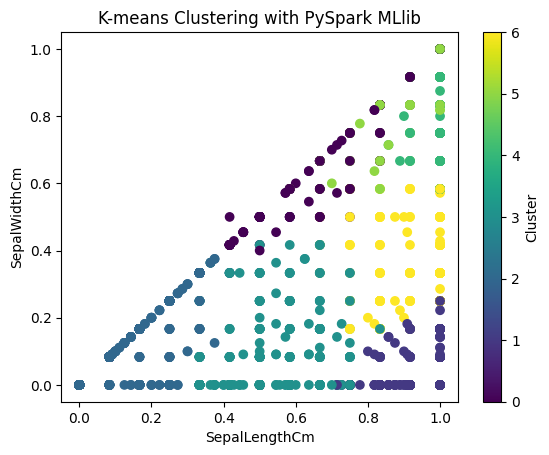

In [53]:
# Converting to Pandas DataFrame
clustered_data_pd = predictDf.toPandas()
# Visualizing the results
plt.scatter(clustered_data_pd["PURCHASES_FREQUENCY"], clustered_data_pd["ONEOFF_PURCHASES_FREQUENCY"], c=clustered_data_pd["prediction"], cmap='viridis')
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.title("K-means Clustering with PySpark MLlib")
plt.colorbar().set_label("Cluster")
plt.show()

In [54]:
fig = px.scatter_3d(clustered_data_pd, x='PURCHASES_FREQUENCY', y='ONEOFF_PURCHASES_FREQUENCY', z='PURCHASES_INSTALLMENTS_FREQUENCY', color='prediction', symbol='BALANCE', template='ggplot2', hover_name='CASH_ADVANCE_FREQUENCY')
fig.show()